# Potassium Current:

## $\displaystyle{I_K=g_K(v-E_K)}$

## $\displaystyle{g_K(v,t)=\bar{g}_Kn^4(v)}$

## $\displaystyle{n \underset{\alpha_n(v)}{\stackrel{\beta_n(v)}{\rightleftharpoons}} (1-n)}$

## $\displaystyle{\frac{dn}{dt}=\alpha_n(1-n)-\beta_nn}$

## For voltage clamp $v$ is constant so $\alpha_n$ and $\beta_n$ are constant

## Solving the ODE: 

## $\displaystyle{n(t)=n_{\infty}-(n_{\infty}-n_0)e^{-t/\tau_n}}$

## where $\displaystyle{n_{\infty}=\frac{\alpha_n}{\alpha_n+\beta_n}}$ and $\displaystyle{\tau_n=\frac{1}{\alpha_n+\beta_n}}$

## $\displaystyle{\alpha_n(v)=\frac{0.01(10-v)}{e^{\frac{10-v}{10}}-1}, \beta_n(v)=0.125e^{\frac{-v}{80}}}$

In [1]:
## Importing libraries
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
np.seterr(divide='ignore', invalid='ignore');

In [2]:
## Defining functions for the potassium current
def alpha_n(v):
    return 0.01*(10-v)/(np.exp((10-v)/10)-1)
def beta_n(v):
    return 0.125*np.exp(-v/80)
def n_inf(v):
    return alpha_n(v)/(alpha_n(v)+beta_n(v))
def tau_n(v):
    return 1/(alpha_n(v)+beta_n(v))

In [3]:
## Creating a voltage clamp experiment
dt=1e-3
T_end=50
t=np.arange(0,T_end+dt,dt)
On=5 #Time of applying vc
Off=30 #Time of removing vc
def voltage_clamp(v0,vC):
    v=t*0+v0
    v[(t>On)*(t<Off)]=vC
    return v

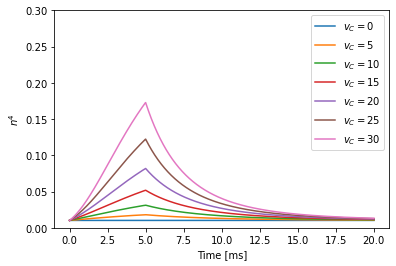

In [50]:
## ploting the gating variable for diffent voltage clamps
tempL=[]
v0=0 #initial voltage, vC is the voltage clamp value
fig = plt.figure()
for vC in np.arange(0,35,5):
    v=voltage_clamp(0,vC)
    n1=n_inf(v)-(n_inf(v)-n_inf(v0))*np.exp(-(t-On)/tau_n(v))
    n2=n_inf(v)-(n_inf(v)-np.max(n1))*np.exp(-(t-Off)/tau_n(v))
    n=v
    n[t<Off]=n1[t<Off]
    n[t>=Off]=n2[t>=Off]
    tempL+=plt.plot(t,n**4,label='$v_C=$'+str(vC))
    
plt.xlabel('Time [ms]')
plt.ylabel('$n^4$')
plt.ylim([0,0.3])
labels = [l.get_label() for l in tempL]
plt.legend(tempL, labels);
plt.show()

## Where is the line for $v_C=10$ ?

## The denominator of $\alpha(v)=\frac{0.01(10-v)}{e^{\frac{10-v}{10}}-1}$ goes to $0$ for $v=10$.

## We can use L'Hospital's rule:

## $\displaystyle{\lim_{v\to10}\alpha_n=\frac{\frac{d}{dv}(0.01(10-v))}{\frac{d}{dv}(e^{\frac{10-v}{10}}-1)}=\frac{-0.01}{-0.1e^{\frac{10-v}{10}}}=0.1}$

In [5]:
## Taking the care of 0/0 for alpha_n
def alpha_n(v):
    temp=(0.01*(10-v)/(np.exp((10-v)/10)-1))
    return np.where(v!=10,temp,0.1)

In [6]:
## Redoing the voltage clamp for Vc=10
vC=10
plt.plot()
v=voltage_clamp(0,vC)
n1=n_inf(v)-(n_inf(v)-n_inf(v0))*np.exp(-(t-On)/tau_n(v))
n2=n_inf(v)-(n_inf(v)-np.max(n1))*np.exp(-(t-Off)/tau_n(v))
n=v
n[t<Off]=n1[t<Off]
n[t>=Off]=n2[t>=Off]
plt.plot(t,n**4,'g');

## Numerical Solution (Euler's Method):

## $\displaystyle{\frac{dn}{dt}=f(n)\Rightarrow\frac{dn}{dt}=\frac{n_{t+dt}-n_t}{dt}=f(n_t)\Rightarrow n_{t+dt}=n_t+dt\times f(n_t)}$

## $\displaystyle{\frac{dn}{dt}=\alpha_n(1-n)-\beta_nn\Rightarrow n_{t+dt}=n_t+dt\times [\alpha_n(1-n_t)-\beta_nn_t]}$

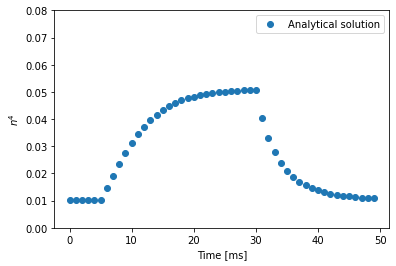

In [51]:
## Analytical solution 
dt=1e-3
T_end=50
t=np.arange(0,T_end+dt,dt)
On=5
Off=30
v0=0
vC=10
fig = plt.figure()
plt.plot()
v=voltage_clamp(0,vC)
n1=n_inf(v)-(n_inf(v)-n_inf(v0))*np.exp(-(t-On)/tau_n(v))
n2=n_inf(v)-(n_inf(v)-np.max(n1))*np.exp(-(t-Off)/tau_n(v))
n=v
n[t<Off]=n1[t<Off]
n[t>=Off]=n2[t>=Off]
plt.plot(t[0:-1:1000],n[0:-1:1000]**4,'o')
plt.xlabel('Time [ms]')
plt.ylabel('$n^4$')
plt.ylim([0,0.08])
plt.legend(["Analytical solution"])
plt.show()

In [8]:
## Numerical Solution using first order explicit Euler's method
dt=20
T_end=50
t=np.arange(0,T_end+dt,dt)
v=v0
n_num=np.zeros(len(t))+n_inf(v)
for i in range(0,len(t)-1):
    n_num[i+1]=n_num[i]+dt*(alpha_n(v)*(1-n_num[i])-beta_n(v)*n_num[i])
    if t[i]>On and t[i]<Off:
        v=vC
    else:
        v=v0
plt.plot(t,n_num**4)    
plt.legend(["Analytical solution","Numerical solution"]);

## Stochastic potassium channel:

## $\displaystyle{
C_1  \underset{\beta_n}{\stackrel {4\alpha_n}{\rightleftharpoons}} C_2
     \underset{2\beta_n}{\stackrel{3\alpha_n}{\rightleftharpoons}} C_3
     \underset{3\beta_n}{\stackrel{2\alpha_n}{\rightleftharpoons}} C_4
     \underset{4\beta_n}{\stackrel{ \alpha_n}{\rightleftharpoons}} O
     }$

### Initial conditions:

### $\displaystyle{P_{C_1}=(1-n_{\infty}(v))^4}$
### $\displaystyle{ P_{C_2}={4 \choose 3}(1-n_{\infty}(v))^3n_{\infty}(v)}$
### $\displaystyle{ P_{C_3}={4 \choose 2}(1-n_{\infty}(v))^2n_{\infty}(v)^2}$
### $\displaystyle{ P_{C_4}={4 \choose 1}(1-n_{\infty}(v))^1n_{\infty}(v)^3}$
### $\displaystyle{P_{O}=n_{\infty}(v)^4}$

## Draw random a number $r$ from a uniform distribution [0,1]

<font size="4"> If </font>$\displaystyle{0<r<P_{C_1}\Rightarrow}$ <font size="4"> Channel is in state </font> $C_1$

<font size="4"> If </font>$\displaystyle{P_{C_1}<r<P_{C_2}\Rightarrow}$ <font size="4"> Channel is in state </font> $C_2$

<font size="4"> If </font>$\displaystyle{P_{C_2}<r<P_{C_3}\Rightarrow}$ <font size="4"> Channel is in state </font> $C_3$

<font size="4"> If </font>$\displaystyle{P_{C_3}<r<P_{C_4}\Rightarrow}$ <font size="4"> Channel is in state </font> $C_4$

<font size="4"> If </font>$\displaystyle{P_{C_4}<r<P_{O}\Rightarrow}$ <font size="4"> Channel is in state </font> $O$

## Hint: it is easier to use cumulative sum

## Run the following code for different values of memberane potential and number of channels to see how the distribution of initial states change

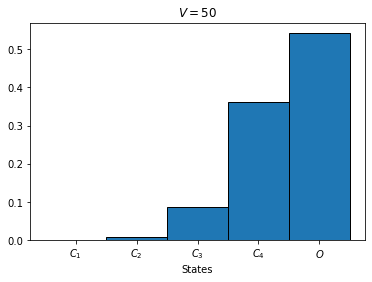

In [52]:
#The initial distribution of channels' state
from scipy.special import comb
V=50 #Initial voltage
N=1000 #Number of Channels
P=np.empty(5)
P[0]=comb(4,4)*(1-n_inf(V))**4*n_inf(V)**0
P[1]=comb(4,3)*(1-n_inf(V))**3*n_inf(V)**1
P[2]=comb(4,2)*(1-n_inf(V))**2*n_inf(V)**2
P[3]=comb(4,1)*(1-n_inf(V))**1*n_inf(V)**3
P[4]=comb(4,0)*(1-n_inf(V))**0*n_inf(V)**4
cP=np.cumsum(P)
S=np.empty(N)
for i in np.arange(0,N):
    r1=np.random.uniform()
    S[i]=np.nonzero(r1<cP)[0][0]+1

fig = plt.figure()
plt.hist(S,bins=np.arange(0.5, 6, step=1.0),density=True,ec='black');
plt.xticks(np.arange(1., 6, step=1.0),['$C_1$','$C_2$','$C_3$','$C_4$','$O$'])
plt.xlabel('States')
plt.title('$V=$'+str(V));

## The transition of a channel between two states follows a Poisson process:
## $\displaystyle{P(\tau)=ke^{-k\tau}}$
## where $k$ is the rate of the Poisson process and $\tau$ is the time that the transition occurs.

## $\displaystyle{P(t<=\tau)=CDF(\tau)=1-e^{k\tau}=r_2\Rightarrow \tau=-\frac{ln(1-r_2)}{k}=-\frac{ln(r_3)}{k}}$

### Event and Transition rates:

## $\displaystyle{
C_1  \underset{\beta_n}{\stackrel {4\alpha_n}{\rightleftharpoons}} C_2
     \underset{2\beta_n}{\stackrel{3\alpha_n}{\rightleftharpoons}} C_3
     \underset{3\beta_n}{\stackrel{2\alpha_n}{\rightleftharpoons}} C_4
     \underset{4\beta_n}{\stackrel{ \alpha_n}{\rightleftharpoons}} O
     }$

## $\displaystyle{k_{C_1}=4\alpha_n}$
## $\displaystyle{k_{C_2}=3\alpha_n+\beta_n}$
## $\displaystyle{k_{C_3}=3\alpha_n+2\beta_n}$
## $\displaystyle{k_{C_4}= \alpha_n+3\beta_n}$
## $\displaystyle{k_{  O}=4\beta_n}$

## $\displaystyle{P_{C_1 \to C_2}}=1$
## $\displaystyle{P_{C_2 \to C_3}=\frac{3\alpha_n}{3\alpha_n+\beta_n}}$
## $\displaystyle{P_{C_2 \to C_1}=\frac{\beta_n}{3\alpha_n+\beta_n}}$
## $\displaystyle{P_{C_3 \to C_4}=\frac{2\alpha_n}{2\alpha_n+2\beta_n}}$
## $\displaystyle{P_{C_3 \to C_2}=\frac{2\beta_n}{2\alpha_n+2\beta_n}}$
## $\displaystyle{P_{C_4 \to O}=\frac{\alpha_n}{\alpha_n+3\beta_n}}$
## $\displaystyle{P_{C_4 \to C_3}=\frac{3\beta_n}{\alpha_n+3\beta_n}}$
## $\displaystyle{P_{O \to C_4}}=1$

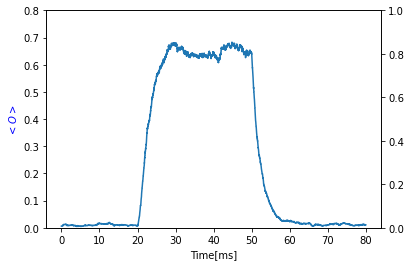

In [53]:
#The stochastic simulation
Tend=80
On=20
Off=50
dt=0.01
T=np.arange(0,Tend,dt)
N=1000
Open=np.zeros([N,len(T)])
v0=0
P=np.empty(5)
P[0]=comb(4,4)*(1-n_inf(v0))**4*n_inf(v0)**0
P[1]=comb(4,3)*(1-n_inf(v0))**3*n_inf(v0)**1
P[2]=comb(4,2)*(1-n_inf(v0))**2*n_inf(v0)**2
P[3]=comb(4,1)*(1-n_inf(v0))**1*n_inf(v0)**3
P[4]=comb(4,0)*(1-n_inf(v0))**0*n_inf(v0)**4

cP=np.cumsum(P)

k=np.empty(5)
K=np.empty(5)

vC=60
for i in range(0,N):
    S=np.zeros(1)
    v=v0
    
    k[0]=4*alpha_n(v)+0*beta_n(v)
    k[1]=3*alpha_n(v)+1*beta_n(v)
    k[2]=2*alpha_n(v)+2*beta_n(v)
    k[3]=1*alpha_n(v)+3*beta_n(v)
    k[4]=0*alpha_n(v)+4*beta_n(v)
    
    
    K[0]=1.0
    K[1]=3*alpha_n(v)/(3*alpha_n(v)+1*beta_n(v))
    K[2]=2*alpha_n(v)/(2*alpha_n(v)+2*beta_n(v))
    K[3]=1*alpha_n(v)/(1*alpha_n(v)+3*beta_n(v))
    K[4]=1.0
    
    r1=np.random.uniform()
    S[0]=np.nonzero(r1<cP)[0][0]
    t=0
    j=0
    States=np.zeros(len(T))+S
    while t<Tend:
        r3=np.random.uniform()
        tau=-np.log(r3)/k[int(S[j])]
        r4=np.random.uniform()
        if S[j]==0:
            S=np.append(S,1)
        elif S[j]==1:
            if r4<K[1]:
                S=np.append(S,2)
            else:
                S=np.append(S,0)
        elif S[j]==2:
            if r4<K[2]:
                S=np.append(S,3)
            else:
                S=np.append(S,1)
        elif S[j]==3:
            if r4<K[3]:
                S=np.append(S,4)
            else:
                S=np.append(S,2)
        else:
            S=np.append(S,3)
        j=j+1
        t=t+tau
        States[T>=t]=S[j]
        if t>On and t<Off-dt:
            if v==v0:
                t=On
                
            v=vC
            k[0]=4*alpha_n(v)+0*beta_n(v)
            k[1]=3*alpha_n(v)+1*beta_n(v)
            k[2]=2*alpha_n(v)+2*beta_n(v)
            k[3]=1*alpha_n(v)+3*beta_n(v)
            k[4]=0*alpha_n(v)+4*beta_n(v)


            K[0]=1.0
            K[1]=3*alpha_n(v)/(3*alpha_n(v)+1*beta_n(v))
            K[2]=2*alpha_n(v)/(2*alpha_n(v)+2*beta_n(v))
            K[3]=1*alpha_n(v)/(1*alpha_n(v)+3*beta_n(v))
            K[4]=1.0
            
        if t>Off:
            if v==vC:
                t=Off
            v=v0
            
            k[0]=4*alpha_n(v)+0*beta_n(v)
            k[1]=3*alpha_n(v)+1*beta_n(v)
            k[2]=2*alpha_n(v)+2*beta_n(v)
            k[3]=1*alpha_n(v)+3*beta_n(v)
            k[4]=0*alpha_n(v)+4*beta_n(v)


            K[0]=1.0
            K[1]=3*alpha_n(v)/(3*alpha_n(v)+1*beta_n(v))
            K[2]=2*alpha_n(v)/(2*alpha_n(v)+2*beta_n(v))
            K[3]=1*alpha_n(v)/(1*alpha_n(v)+3*beta_n(v))
            K[4]=1.0
            
    temp=States==4
    temp[temp==True]=1.0
    Open[i,:]=temp

temp=np.mean(Open,0)

fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(T,temp);
ax1.set_xlabel('Time[ms]')
ax1.set_ylabel('$<O>$',color='b')
ax1.set_ylim([0,0.8]);

In [54]:
# Deterministic simulation
v=v0
n_num=np.zeros(len(T))+n_inf(v)
for i in range(0,len(T)-1):
    n_num[i+1]=n_num[i]+dt*(alpha_n(v)*(1-n_num[i])-beta_n(v)*n_num[i])
    if T[i]>On and T[i]<Off:
        v=vC
    else:
        v=v0
ax2.plot(T,n_num**4,'r')
ax2.set_ylabel('$n^4$',color='r')
ax2.set_ylim([0,0.8]);

## $\displaystyle{\sigma^2=Np(1-p),p=n^4}$

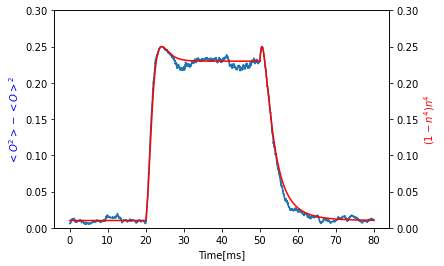

In [55]:
# Variance
temp=np.var(Open,0)
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(T,temp);
ax1.set_xlabel('Time[ms]')
ax1.set_ylabel('$<O^2>-<O>^2$',color='b')
ax1.set_ylim([0,0.3]);
ax2.plot(T,n_num**4*(1-n_num**4),'r')
ax2.set_ylabel('$(1-n^4)n^4$',color='r')
ax2.set_ylim([0,0.3]);

# Sodium Current:

## $\displaystyle{I_{Na}=g_{Na}(v-E_{Na})}$

## $\displaystyle{g_{Na}(v,t)=\bar{g}_{Na}m^3(v)h(v)}$

## ${\displaystyle\frac{dm}{dt}=\alpha_m(1-m)-\beta_mm}$
## ${\displaystyle\frac{dh}{dt}=\alpha_h(1-h)-\beta_hh}$

## ${\displaystyle\alpha_m(v)=\frac{0.1(25-v)}{e^{\frac{25-v}{10}}-1}, \beta_m(v)=4e^{\frac{-v}{18}}}$
## ${\displaystyle\alpha_h(v)=0.07e^{\frac{-v}{20}},\beta_h(v)=\frac{1}{1+e^{\frac{30-v}{10}}}}$

In [13]:
# Functions for sodium
def alpha_m(v):
    temp=0.1*(25-v)/(np.exp((25-v)/10)-1)
    return np.where(v!=25,temp,1.0)
def beta_m(v):
    return 4.0*np.exp(-v/18)
def m_inf(v):
    return alpha_m(v)/(alpha_m(v)+beta_m(v))
def tau_m(v):
    return 1/(alpha_m(v)+beta_m(v))

In [14]:
# Functions for sodium
def alpha_h(v):
    return 0.07*np.exp(-v/20)
def beta_h(v):
    return 1.0/(1+np.exp((30-v)/10))
def h_inf(v):
    return alpha_h(v)/(alpha_h(v)+beta_h(v))
def tau_h(v):
    return 1/(alpha_h(v)+beta_h(v))

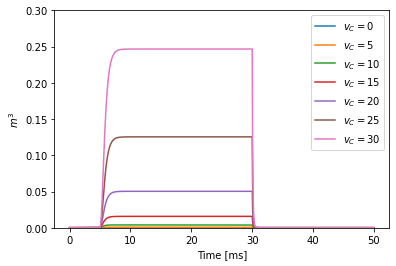

In [56]:
# Voltage clamp for m
dt=1e-3
T_end=50
t=np.arange(0,T_end+dt,dt)
On=5
Off=30
tempL=[]
v0=0
fig = plt.figure()
for vC in np.arange(0,35,5):
    v=voltage_clamp(0,vC)
    m1=m_inf(v)-(m_inf(v)-m_inf(v0))*np.exp(-(t-On)/tau_m(v))
    m2=m_inf(v)-(m_inf(v)-np.max(m1))*np.exp(-(t-Off)/tau_m(v))
    m=v
    m[t<Off]=m1[t<Off]
    m[t>=Off]=m2[t>=Off]
    tempL+=plt.plot(t,m**3,label='$v_C=$'+str(vC))
    
plt.xlabel('Time [ms]')
plt.ylabel('$m^3$')
plt.ylim([0,0.3])
labels = [l.get_label() for l in tempL]
plt.legend(tempL, labels);
plt.show()

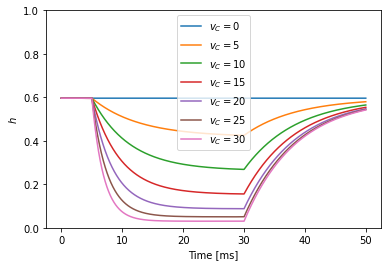

In [57]:
# Voltage clamp for h
tempL=[]
v0=0
fig = plt.figure()
for vC in np.arange(0,35,5):
    v=voltage_clamp(0,vC)
    h1=h_inf(v)-(h_inf(v)-h_inf(v0))*np.exp(-(t-On)/tau_h(v))
    h2=h_inf(v)-(h_inf(v)-np.min(h1))*np.exp(-(t-Off)/tau_h(v))
    h=v
    h[t<Off]=h1[t<Off]
    h[t>=Off]=h2[t>=Off]
    tempL+=plt.plot(t,h,label='$v_C=$'+str(vC))
    
plt.xlabel('Time [ms]')
plt.ylabel('$h$')
plt.ylim([0,1.0])
labels = [l.get_label() for l in tempL]
plt.legend(tempL, labels)
plt.show();

## Steady state values for all the channels

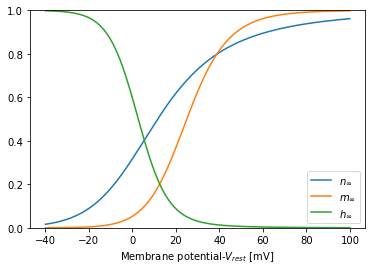

In [58]:
V=np.arange(-40,100,0.1)
Ns=n_inf(V)
Ms=m_inf(V)
Hs=h_inf(V)
fig = plt.figure()
plt.plot(V,Ns,V,Ms,V,Hs)
plt.xlabel('Membrane potential-$V_{rest}$ [mV]')
plt.ylim([0,1.0])
plt.legend(['$n_\infty$','$m_\infty$','$h_\infty$'])
plt.show()

## Time constants for all the channels

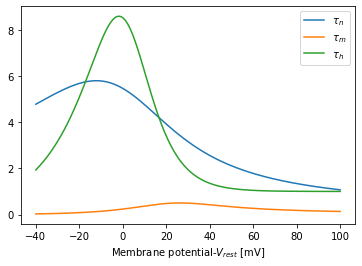

In [59]:
V=np.arange(-40,100,0.1)
Ns=tau_n(V)
Ms=tau_m(V)
Hs=tau_h(V)
fig = plt.figure()
plt.plot(V,Ns,V,Ms,V,Hs)
plt.xlabel('Membrane potential-$V_{rest}$ [mV]')
# plt.ylim([0,1.0])
plt.legend([r'$ \tau_n $',r'$\tau_m$',r'$\tau_h$'])
plt.show()

# Hodgkin–Huxley model:

![title](Circuit.png)

## The currents that were not account for are included as leak currents:

## $\displaystyle{I_L=\bar{g}_L(v-E_L)}$

## Putting all the currents together we have:

## $\displaystyle{I_C+I_{Na}+I_K+I_L-I_{ext}=0}$
## $\displaystyle{C_m\frac{dv}{dt}+g_{Na}(v-E_{Na})+g_{K}(v-E_{K})+g_{L}(v-E_{L})-I_{ext}=0}$

## Conductances:

## $\displaystyle{g_K(v,t)=\bar{g}_Kn^4(v)}$
## $\displaystyle{g_{Na}(v,t)=\bar{g}_{Na}m^3(v)h(v)}$
## $\displaystyle{\frac{dn}{dt}=\alpha_n(1-n)-\beta_nn}$
## ${\displaystyle\frac{dm}{dt}=\alpha_m(1-m)-\beta_mm}$
## ${\displaystyle\frac{dh}{dt}=\alpha_h(1-h)-\beta_hh}$

## Rates:

## $\displaystyle{\alpha_n(v)=\frac{0.01(10-v)}{e^{\frac{10-v}{10}}-1}, \beta_n(v)=0.125e^{\frac{-v}{80}}}$
## ${\displaystyle\alpha_m(v)=\frac{0.1(25-v)}{e^{\frac{25-v}{10}}-1}, \beta_m(v)=4e^{\frac{-v}{18}}}$
## ${\displaystyle\alpha_h(v)=0.07e^{\frac{-v}{20}},\beta_h(v)=\frac{1}{1+e^{\frac{30-v}{10}}}}$

## Constants:

## $\displaystyle{C_M=1.0\mu Fcm^{-2}}$
## $\displaystyle{E_K=-12mV,\bar{g}_{K}=36mScm^{-2}}$
## $\displaystyle{E_{Na}=115mV,\bar{g}_{Na}=120mScm^{-2}}$
## $\displaystyle{E_L=10.6mV,\bar{g}_{L}=0.3mScm^{-2}}$

## We can use Euler's method again to solve the system of equations for $v,n,m,h$:

In [19]:
# function to time march HH model
def HHmodel(v0,I_ext):
    C_m=1
    E_K=-12
    g_K=36
    E_Na=115
    g_Na=120
    E_L=10.6
    g_L=0.3
    v=np.zeros(len(t))+v0
    n=np.zeros(len(t))+n_inf(v0)
    m=np.zeros(len(t))+m_inf(v0)
    h=np.zeros(len(t))+h_inf(v0)
    for i in range(0,len(t)-1):

        I_K =g_K *n[i]**4     *(v[i]-E_K)
        I_Na=g_Na*m[i]**3*h[i]*(v[i]-E_Na)
        I_L =g_L              *(v[i]-E_L)

        n[i+1]=n[i]+dt*(alpha_n(v[i])*(1-n[i])-beta_n(v[i])*n[i])
        m[i+1]=m[i]+dt*(alpha_m(v[i])*(1-m[i])-beta_m(v[i])*m[i])
        h[i+1]=h[i]+dt*(alpha_h(v[i])*(1-h[i])-beta_h(v[i])*h[i])
        v[i+1]=v[i]+dt*(-I_K-I_Na-I_L+I_ext[i])/C_m
    Solution={'v':v,'n':n,'m':m,'h':h}
    return Solution

In [20]:
# Function for plotting HH model states
def plotHH(Key):
    fig,ax1 = plt.subplots()
    ax2 = ax1.twinx()
    for Items in Key:
        State=Solution[Items]
        ax1.plot(t,State);
        ax1.set_xlabel('Time[ms]')
        if Items=='v':
            Label='Membrane potential-$V_{rest}$ $[mV]$'
            ax1.set_ylim([-20,120]);
        else:
            Label='Gating variable'
        
    ax1.set_ylabel(Label)
    ax1.legend(Key)
    ax2.plot(t,I_ext,'r')
    ax2.set_ylabel('I$_{ext}$$[\mu A/cm^2]$',color='r')
    ax2.set_ylim([5*np.min(I_ext)-np.max(I_ext),5*np.max(I_ext)-np.min(I_ext)]);

### Small injected currents do not cause action potentials:

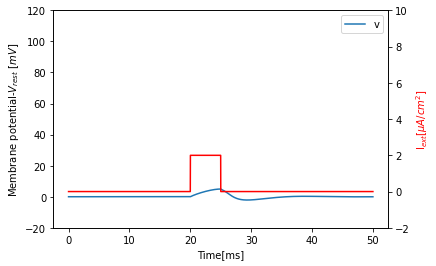

In [21]:
%matplotlib inline 
dt=0.01
T_end=50
t=np.arange(0,T_end+dt,dt)
On=20
Off=25
I_ext=np.zeros(len(t))
I_ext[(t>On)*(t<Off)]=2
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

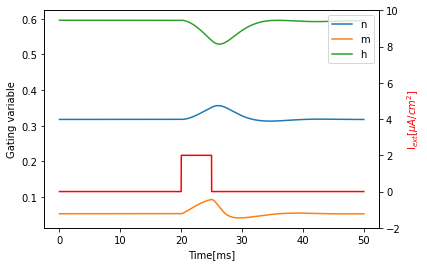

In [22]:
plotHH(['n','m','h'])

### Large enough injected currents lead to action potentials:

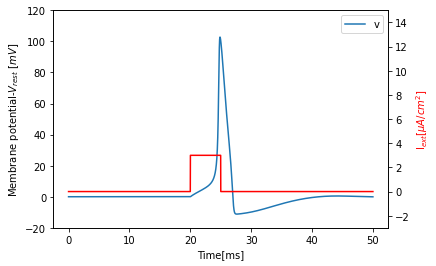

In [23]:
dt=0.01
T_end=50
t=np.arange(0,T_end+dt,dt)
On=20
Off=25
I_ext=np.zeros(len(t))
I_ext[(t>On)*(t<Off)]=3
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

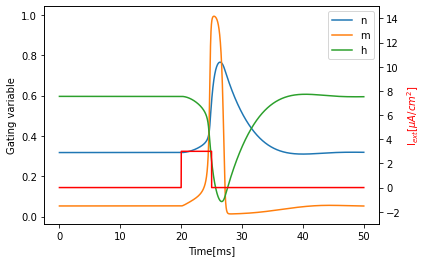

In [24]:
plotHH(['n','m','h'])

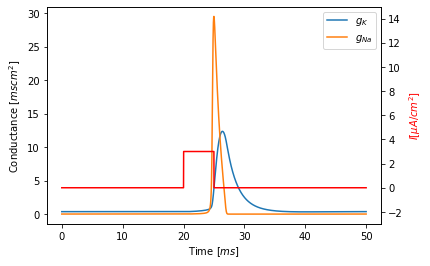

In [25]:
g_K=36
g_Na=120
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.plot(t,g_K*Solution['n']**4,t,g_Na*Solution['m']**3*Solution['h']);
ax1.set_ylabel('Conductance $[mscm^2]$')
ax1.set_xlabel('Time $[ms]$')
ax1.legend(['$g_K$','$g_{Na}$'])
ax2.plot(t,I_ext,'r')
ax2.set_ylabel('$I[\mu A/cm^2]$',color='r')
ax2.set_ylim([5*np.min(I_ext)-np.max(I_ext),5*np.max(I_ext)-np.min(I_ext)]);

### What happens if we provide a second pulse?

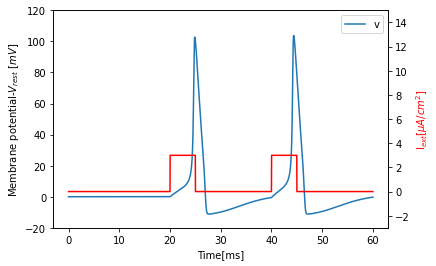

In [26]:
dt=0.01
T_end=60
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=25

On2=40
Off2=45

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=3
I_ext[(t>On2)*(t<Off2)]=3
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

### Is it possible to generate action potentials with shorter pluses?

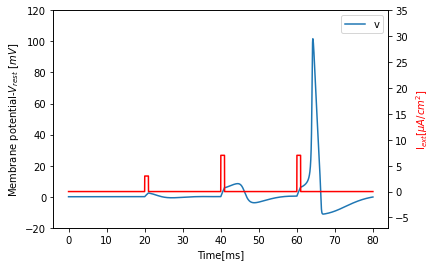

In [27]:
dt=0.01
T_end=80
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=21

On2=40
Off2=41

On3=60
Off3=61

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=3
I_ext[(t>On2)*(t<Off2)]=7
I_ext[(t>On3)*(t<Off3)]=7
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

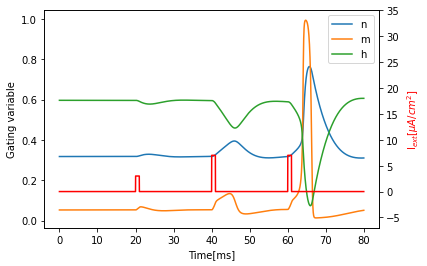

In [28]:
plotHH(['n','m','h'])

### What happens when the pulses are closer to each other?

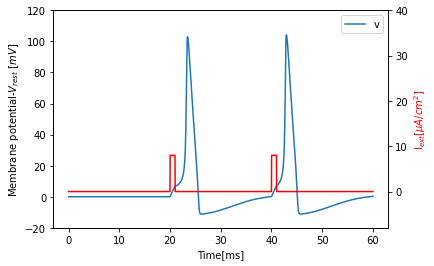

In [29]:
dt=0.01
T_end=60
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=21

On2=40
Off2=41

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=8
I_ext[(t>On2)*(t<Off2)]=8
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

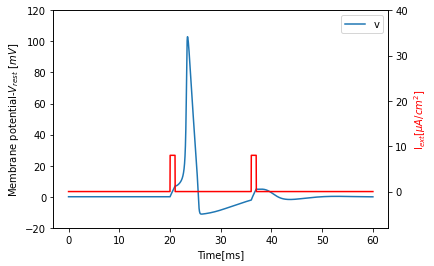

In [30]:
dt=0.01
T_end=60
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=21

On2=36
Off2=37

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=8
I_ext[(t>On2)*(t<Off2)]=8
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

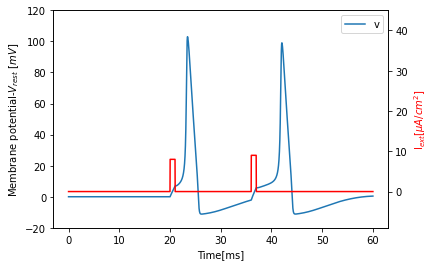

In [31]:
dt=0.01
T_end=60
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=21

On2=36
Off2=37

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=8
I_ext[(t>On2)*(t<Off2)]=9
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

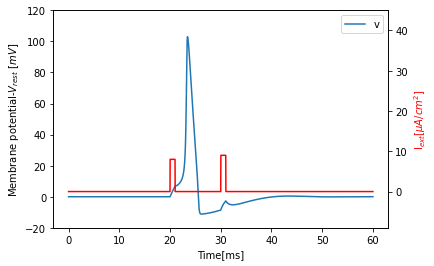

In [32]:
dt=0.01
T_end=60
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=21

On2=30
Off2=31

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=8
I_ext[(t>On2)*(t<Off2)]=9
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

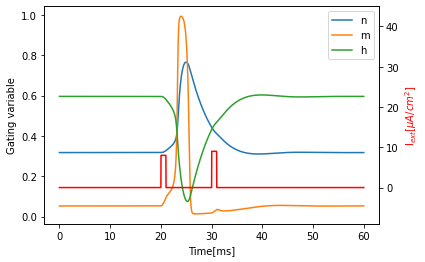

In [33]:
plotHH(['n','m','h'])

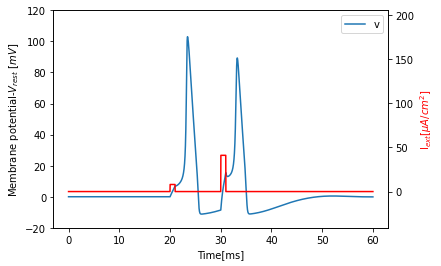

In [34]:
dt=0.01
T_end=60
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=21

On2=30
Off2=31

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=8
I_ext[(t>On2)*(t<Off2)]=41
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

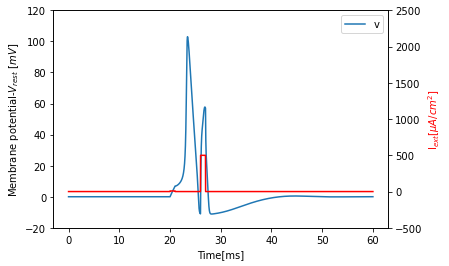

In [35]:
dt=0.01
T_end=60
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=21

On2=26
Off2=27

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=8
I_ext[(t>On2)*(t<Off2)]=500
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

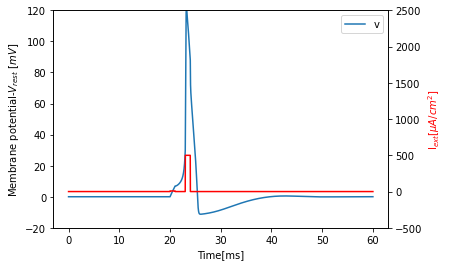

In [36]:
dt=0.01
T_end=60
t=np.arange(0,T_end+dt,dt)
On1=20
Off1=21

On2=23
Off2=24

I_ext=np.zeros(len(t))
I_ext[(t>On1)*(t<Off1)]=8
I_ext[(t>On2)*(t<Off2)]=500
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

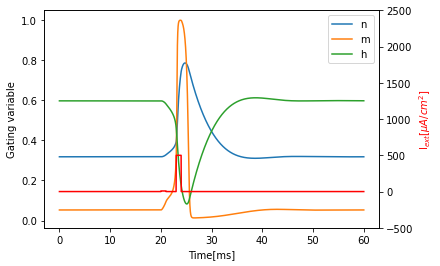

In [37]:
plotHH(['n','m','h'])

## The period that even a strong second stimulus cannot cuase a second action potential is called the <u>*absolute refractory*</u> period.

## The period that only a strong second stimulus can cuase a second action potential is called the <u>*relative refractory*</u> period.

## What happens during a hyperpolarization stimulus?

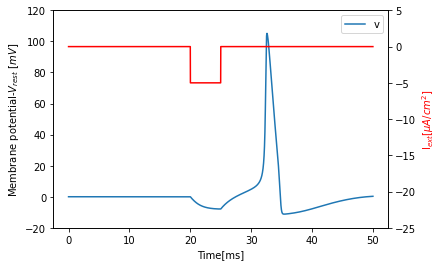

In [38]:
dt=0.01
T_end=50
t=np.arange(0,T_end+dt,dt)
On=20
Off=25
I_ext=np.zeros(len(t))
I_ext[(t>On)*(t<Off)]=-5
v0=0
Solution=HHmodel(v0,I_ext)
plotHH(['v'])

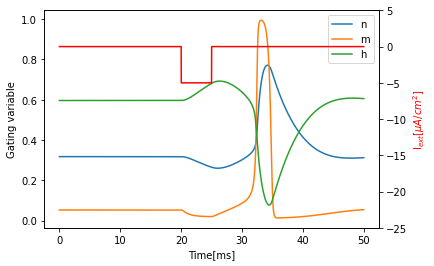

In [39]:
plotHH(['n','m','h'])

## The effect of temperature
### The rates of activation and inactivation increase with increasing temperature
## $\displaystyle{Q_{10}=\frac{\text{rate at } T+10^\circ \mathrm{C}}{\text{rate at } T}}$
## $\displaystyle{\alpha(v,T_2)=\alpha(V,T_1)Q_{10}^{\frac{T_2-T_1}{10}}}$
### $\displaystyle{Q_{10}}$ is about 3 for the rates in the H-H model

# Stability analysis:

## Particle in a potential well

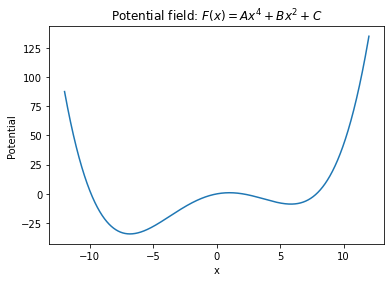

In [40]:
A=0.05/4.0
B=-2.05/2.0
C=2.0

def F(x):
    return A*x**4+B*x**2+C*x
def dF(x):
    return 4*A*x**3+2*B*x+C

xx=np.arange(-12,12,0.01)
yy=F(xx)
fig = plt.figure()
plt.plot(xx,yy)
plt.xlabel('x')
plt.ylabel('Potential')
plt.title('Potential field: $F(x)=Ax^4+Bx^2+C$');

## $\displaystyle{\frac{dx}{dt}=V}$
## $\displaystyle{\frac{dV}{dt}=-F'(x)}$

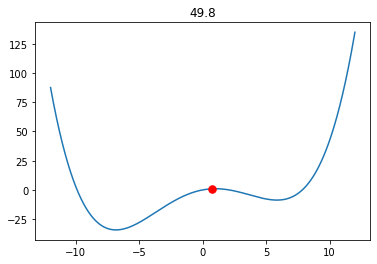

In [41]:
%matplotlib inline
import time
from IPython import display
dt=0.01
T_end=50
t=np.arange(0,T_end+dt,dt)
X0=[(-1.-np.sqrt(1.+C/A))/2.,1.,(-1.+np.sqrt(1.+C/A))/2.]
x=np.zeros(len(t))+X0[1]
V=np.zeros(len(t))
dX=0
fig = plt.figure()
Ax = fig.add_subplot(111)
plt.xlabel('x')
plt.ylabel('Potential')

for i in range(0,len(t)-1):
    x[i+1]=x[i]+dt*(V[i]+dX)
    V[i+1]=V[i]+dt*(-dF(x[i]))
    if t[i]>10 and t[i]<10+0.05:
        dX=0.1
    else:
        dX=0
    if i%20==0:
        Ax.cla()
        plt.title(round(t[i],2))
        plt.plot(xx,yy)
        plt.plot(x[i],F(x[i]),'r.',markersize=15)
        display.display(plt.gcf())
        display.clear_output(wait=True)
        time.sleep(0.001)
        

## Linear stability analysis:

## $\displaystyle{\frac{d}{dt}\begin{pmatrix}
  x \\V\end{pmatrix}=\begin{pmatrix}
  V \\-F'(x)\end{pmatrix}\Rightarrow \frac{d}{dt}\boldsymbol{X}=f(\boldsymbol{X})}$
## $\displaystyle{J=\begin{pmatrix}
  \partial f_1/\partial x_1 && \partial f_1/\partial x_2\\
  \partial f_2/\partial x_2 && \partial f_2/\partial x_2\end{pmatrix}=
  \begin{pmatrix}-F''(x) &&  0\\0 && 1\end{pmatrix}}$
## $\displaystyle{|J-\lambda I|=0}\Rightarrow \lambda=-F''(x_0)$
## $\displaystyle{\lambda<0: \text{     Stable}}$
## $\displaystyle{\lambda>0: \text{     Usntable}}$
## $\displaystyle{x_0 \text{    are the fixed points where  } \frac{dx}{dt}=0 \text{   and   } \frac{dV}{dt}=0 }$

## We can use the same concept for the H-H model:

## $\displaystyle{\frac{d}{dt}\begin{pmatrix}
  n \\m\\h\\v\end{pmatrix}=\begin{pmatrix}
  \alpha_n(1-n)-\beta_nn \\
  \alpha_m(1-m)-\beta_mm \\
  \alpha_h(1-h)-\beta_hh \\
  [-\bar{g}_{Na}n^4(v-E_{Na})-\bar{g}_{K}m^3h(v-E_{K})-\bar{g}_{L}(v-E_{L})+I_{ext}]/C_m
  \end{pmatrix}}$

## The analysis is more complicated yet still possible. However, let's focus on the fast dynamics of $m$ and $v$:

## ${\displaystyle\frac{dm}{dt}=\alpha_m(1-m)-\beta_mm}$
## ${\displaystyle\frac{dv}{dt}=[-\bar{g}_{Na}n_{\infty}^4(v-E_{Na})-\bar{g}_{K}m^3h_{\infty}(v-E_{K})-\bar{g}_{L}(v-E_{L})+I_{ext}]/C_m}$

## The lines where ${\displaystyle\frac{dm}{dt}=0}$ and ${\displaystyle\frac{dv}{dt}=0}$ are called nullclines.

In [42]:
n0=n_inf(0)
h0=h_inf(0)
def v_inf(m):
    E_K=-12
    g_K=36
    E_Na=115
    g_Na=120
    E_L=10.6
    g_L=0.3
    return (g_Na*m**3*h0*E_Na+g_K*n0**4*E_K+g_L*E_L)/(g_Na*m**3*h0+g_K*n0**4+g_L)

## Phase plane analysis:

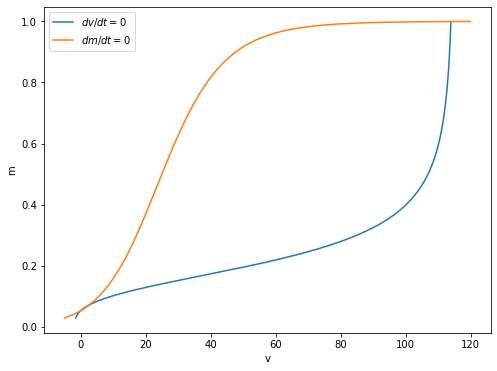

In [43]:
fig = plt.figure(figsize=(8, 6))
vv=np.arange(-5,120,0.1)
y=m_inf(vv)
x=v_inf(y)
plt.plot(x,y,vv,y)
plt.xlabel('v')
plt.ylabel('m')
plt.legend(['$dv/dt=0$','$dm/dt=0$']);

In [44]:
def FastHHmodel(v0,m0,I_ext):
    C_m=1
    E_K=-12
    g_K=36
    E_Na=115
    g_Na=120
    E_L=10.6
    g_L=0.3
    v=np.zeros(len(t))+v0
    n0=n_inf(0)
    m=np.zeros(len(t))+m0
    h0=h_inf(0)
    for i in range(0,len(t)-1):

        I_K =g_K *n0**4     *(v[i]-E_K)
        I_Na=g_Na*m[i]**3*h0*(v[i]-E_Na)
        I_L =g_L              *(v[i]-E_L)
        m[i+1]=m[i]+dt*(alpha_m(v[i])*(1-m[i])-beta_m(v[i])*m[i])
        v[i+1]=v[i]+dt*(-I_K-I_Na-I_L+I_ext[i])/C_m
    Solution={'v':v,'m':m}
    return Solution

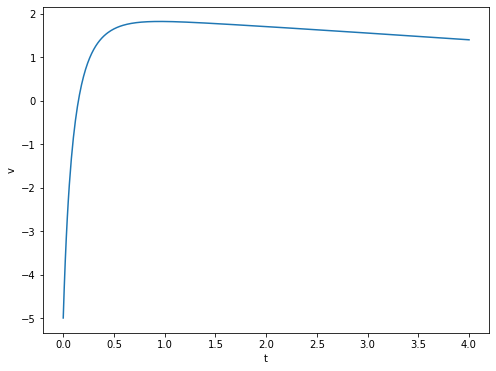

In [45]:
dt=0.01
T_end=4
t=np.arange(0,T_end+dt,dt)
On=20
Off=25
I_ext=np.zeros(len(t))
I_ext[(t>On)*(t<Off)]=0
Solution=FastHHmodel(-5,0.2,I_ext)
fig = plt.figure(figsize=(8, 6))
plt.plot(t,Solution['v'])
plt.xlabel('t')
plt.ylabel('v');

In [46]:
def Trace(c):
    xx=Solution['v']
    yy=Solution['m']
    color=c+'.'
    for i in range(0,len(t)-1):
        if i%5==0:
            plt.title(round(t[i],2))
            plt.plot(xx[i],yy[i],color,markersize=10);
            display.display(plt.gcf())
            display.clear_output(wait=True)

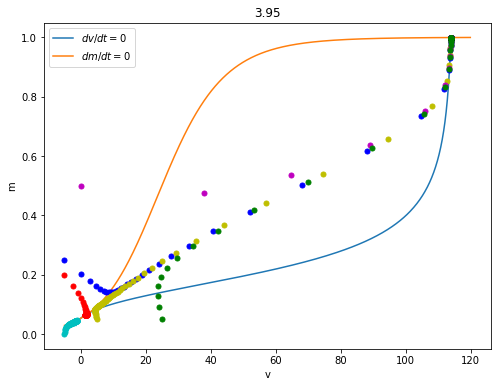

In [47]:
fig = plt.figure(figsize=(8, 6))
vv=np.arange(-5,120,0.1)
y=m_inf(vv)
x=v_inf(y)
plt.plot(x,y,vv,y)
plt.xlabel('v')
plt.ylabel('m')
plt.legend(['$dv/dt=0$','$dm/dt=0$'])
Solution=FastHHmodel(-5,0.20,I_ext)
Trace('r')
Solution=FastHHmodel(-5,0.25,I_ext)
Trace('b')
Solution=FastHHmodel(5,0.05,I_ext)
Trace('y')
Solution=FastHHmodel(0,0.5,I_ext)
Trace('m')
Solution=FastHHmodel(-5,0,I_ext)
Trace('c')
Solution=FastHHmodel(25,0.05,I_ext)
Trace('g')

In [48]:
dt=0.01
T_end=20
t=np.arange(0,T_end+dt,dt)
On=0
Off=5
I_ext=np.zeros(len(t))
I_ext[(t>On)*(t<Off)]=5
v0=0
Solution=HHmodel(v0,I_ext)

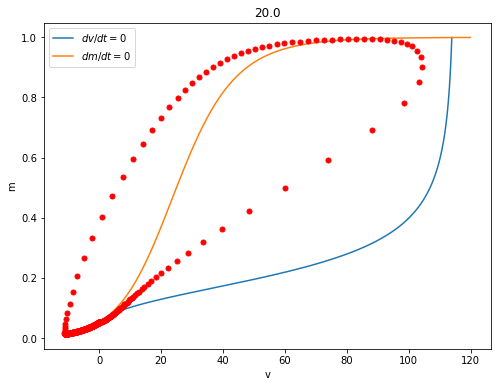

In [49]:
fig = plt.figure(figsize=(8, 6))
plt.plot(x,y,vv,y)
plt.xlabel('v')
plt.ylabel('m')
plt.legend(['$dv/dt=0$','$dm/dt=0$']);
xx=Solution['v']
yy=Solution['m']
for i in range(0,len(t)-1):
    if i%5==0:
        plt.title(round(t[i],2))
        plt.plot(xx[i],yy[i],'r.',markersize=10);
        display.display(plt.gcf())
        display.clear_output(wait=True)